In [47]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
# import sklearn as sk
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestClassifier

### Selecionando Colunas

In [104]:
# colunas_microdados = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
#        'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
#        'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
#        'CO_MUNICIPIO_ESC', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
#        'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
#        'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', "Educação do Pai", "Educação da Mãe",
#        "Número de Residentes", "Renda Familiar", "Acesso a Computadores", "Acesso a Internet"]


# colunas_questionario = ['NU_INSCRICAO', 'TP_RESPOSTA', 'Q001', 'Q002', 'Q003',
#        'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
#        'Q022', 'Q023', 'Q024', 'Q025A', 'Q025B', 'Q025C', 'Q025D', 'Q025E',
#        'Q025F', 'Q026A', 'Q026B', 'Q026C', 'Q026D', 'Q026E', 'Q026F', 'Q026G',
#        'Q026H', 'Q027', 'Q028A', 'Q028B', 'Q028C', 'Q028D', 'Q028E', 'Q028F',
#        'Q028G', 'Q028H', 'Q028I', 'Q028J', 'Q028K', 'Q028L', 'Q028M', 'Q028N',
#        'Q028O', 'Q028P','Q028Q', 'Q028R', 'Q029', 'Q030A', 'Q030B', 'Q030C',
#        'Q030D', 'Q030E', 'Q030F', 'Q030G']

In [49]:
colunas = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_COR_RACA', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NU_NOTA_MT','NU_NOTA_REDACAO', "Educação do Pai", "Educação da Mãe",
       "Número de Residentes", "Renda Familiar", "Acesso a Computadores", "Acesso a Internet",
       'Q001', 'Q002', 'Q003', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
       'Q022', 'Q023', 'Q024', 'Q027', 'Q028A', 'Q028B', 'Q028C', 'Q028D', 'Q028E', 'Q028F',
       'Q028G', 'Q028H', 'Q028I', 'Q028J', 'Q028K', 'Q028L', 'Q028M', 'Q028N',
       'Q028O', 'Q028P','Q028Q', 'Q028R', 'Q029', 'Q030A', 'Q030B', 'Q030C',
       'Q030D', 'Q030E', 'Q030F', 'Q030G']

#remover Q029

### Importando dados e reduzindo tamanho dos arquivos

Como foi explicado no README, para reduzir o tamanho dos arquivos, realizamos:
- Remoção de colunas
- Remoção de alunos que não estiveram presentes em algum dia de prova
- Remoção de alunos que não realizaram o questionário

In [50]:
# import colunas selecionadas
# df_microdados = pd.read_csv('DADOS/MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1', usecols=colunas_microdados)
# df_questionario = pd.read_csv('DADOS/QUEST_HAB_ESTUDO.csv', sep=';', encoding='ISO-8859-1', usecols=colunas_questionario)

# Filtra linhas onde TP_PRESENCA_CH é 1 & TP_PRESENCA_CN é 1 & TP_PRESENCA_LC é 1 & TP_PRESENCA_MT é 1
#data_presentes = df_microdados[(df_microdados['TP_PRESENCA_CH'] == 1) & (df_microdados['TP_PRESENCA_CN'] == 1) & (df_microdados['TP_PRESENCA_LC'] == 1) & (df_microdados['TP_PRESENCA_MT'] == 1)]
# Filtra linhas onde TP_PRESENCA_ch é 0 OR TP_PRESENCA_CN é 0 OR TP_PRESENCA_LC é 0 OR TP_PRESENCA_MT é 0
# data_faltantes = df_microdados[(df_microdados['TP_PRESENCA_CH'] == 0) | (df_microdados['TP_PRESENCA_CN'] == 0) | (df_microdados['TP_PRESENCA_LC'] == 0) | (df_microdados['TP_PRESENCA_MT'] == 0)]

# qst_respondido = df_questionario[(df_questionario['TP_RESPOSTA'] == 1)]
# df_reduzido = pd.merge(data_presentes, qst_respondido, on='NU_INSCRICAO', how='inner')
# df_reduzido.to_csv('DADOS/microdados_reduzido.csv', sep=';', encoding='ISO-8859-1')

In [51]:
df_microdados = pd.read_csv('DADOS/microdados_reduzido.csv', sep=';', encoding='ISO-8859-1', usecols=colunas)

In [52]:
# Renomear valores
racas_dict = { 0: 'Não declarado', 1: 'Branca', 2: 'Preta',
            3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Sem informação'}
idades_dict = {   
    0: 'Menor de 17 anos', 1: '17 anos', 2: '18 anos', 3: '19 anos', 4: '20 anos',
    5: '21 anos', 6: '22 anos', 7:'23 anos', 8:'24 anos', 9:'25 anos',
    10: 'Entre 26 e 30 anos', 11:'Entre 31 e 35 anos', 12:'Entre 36 e 40 anos',
    13: 'Entre 41 e 45 anos', 14: 'Entre 46 e 50 anos', 15: 'Entre 51 e 55 anos',
    16: 'Entre 56 e 60 anos', 17: 'Entre 61 e 65 anos', 19: 'Entre 66 e 70 anos', 
    20: 'Maior de 70 anos'  
}

codigos_capitais = {
    "Rio Branco": 1200401,
    "Maceió": 2704302,
    "Macapá": 1600303,
    "Manaus": 1302603,
    "Salvador": 2927408,
    "Fortaleza": 2304400,
    "Brasília": 5300108,
    "Vitória": 3205309,
    "Goiânia": 5208707,
    "São Luís": 2111300,
    "Cuiabá": 5103403,
    "Campo Grande": 5002704,
    "Belo Horizonte": 3106200,
    "Belém": 1501402,
    "João Pessoa": 2507507,
    "Curitiba": 4106902,
    "Recife": 2611606,
    "Teresina": 2211001,
    "Rio de Janeiro": 3304557,
    "Natal": 2408102,
    "Porto Alegre": 4314902,
    "Porto Velho": 1100205,
    "Boa Vista": 1400100,
    "Florianópolis": 4205407,
    "São Paulo": 3550308,
    "Aracaju": 2800308,
    "Palmas": 1721000
}

replace_dict_abdcde = {"A":'Não', "B":'Sim, 1', "C":"Sim, 2", "D":"Sim, 3", "E":"Sim, 4+"}
replace_dict_ab = {"A":'Não', "B":'Sim'}
dict_area = {'NU_NOTA_CN': "Nota de Ciências da Natureza", "NU_NOTA_CH": "Nota de Ciências Humanas", 'NU_NOTA_LC': "Nota de Linguagens e Códigos", 'NU_NOTA_MT':"Nota de Matemática", 'NU_NOTA_REDACAO': "Nota da Redação"}

In [53]:
df_microdados["Acesso a Computadores"] = df_microdados["Acesso a Computadores"].replace(replace_dict_abdcde)
df_microdados["Acesso a Internet"] = df_microdados["Acesso a Internet"].replace(replace_dict_ab)

for i in range(0,18):
    df_microdados.loc[df_microdados['TP_FAIXA_ETARIA'] == i, 'TP_FAIXA_ETARIA'] = idades_dict[i]
for i in range(0, 7):
    df_microdados.loc[df_microdados['TP_COR_RACA'] == i, 'TP_COR_RACA'] = racas_dict[i]

### Mensurando Grupos de Raça e Idade que realizaram o ENEM

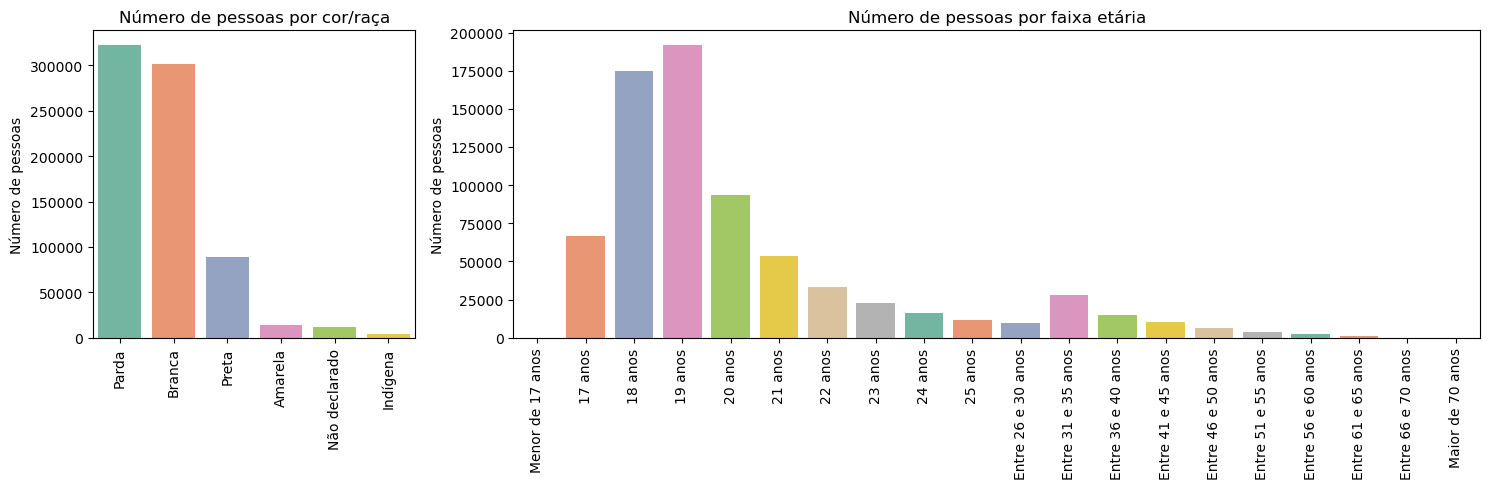

In [54]:
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Primeiro plot: Raça
sns.barplot(x=df_microdados['TP_COR_RACA'].value_counts().index, y=df_microdados['TP_COR_RACA'].value_counts(), ax=ax1, palette='Set2', width=0.8)
ax1.set_ylabel('Número de pessoas')
ax1.set_title('Número de pessoas por cor/raça')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('')

# Segundo plot: Faixa Etária
sns.barplot(x=df_microdados['TP_FAIXA_ETARIA'].value_counts().index, y=df_microdados['TP_FAIXA_ETARIA'].value_counts(), ax=ax2, palette='Set2', order=idades_dict.values())
ax2.set_ylabel('Número de pessoas')
plt.xlabel('Faixa Etária')
ax2.set_title('Número de pessoas por faixa etária')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_xlabel('')

plt.tight_layout();
plt.show()

### Comparando desempenho dos alunos por tipo de escola (pública e privada)

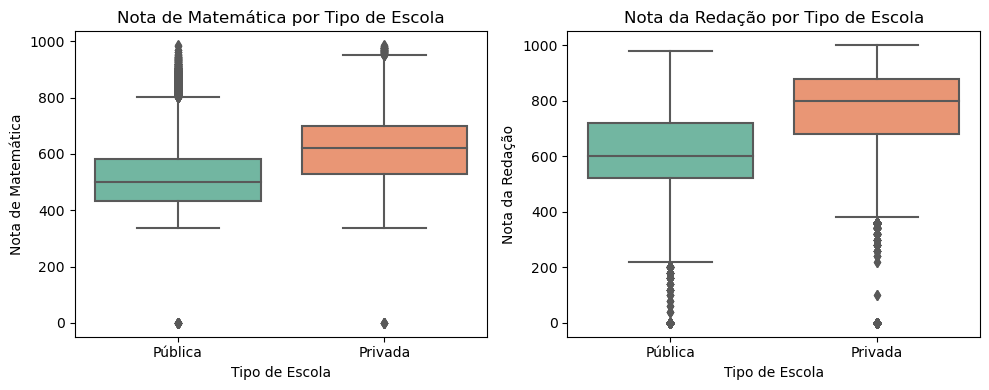

In [55]:
# Use .copy() para garantir que você tenha uma cópia independente do DataFrame original
df_microdados = df_microdados.copy()
df_microdados.loc[:, 'TIPO_ESCOLA'] = df_microdados['TP_ESCOLA'].map({2: 'Pública', 3: 'Privada'})
# create two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes = axes.flatten()

sns.boxplot(x='TIPO_ESCOLA', y='NU_NOTA_MT', data=df_microdados, ax=axes[0], palette='Set2')
axes[0].set_xlabel('Tipo de Escola')
axes[0].set_ylabel('Nota de Matemática')
axes[0].set_title('Nota de Matemática por Tipo de Escola')

sns.boxplot(x='TIPO_ESCOLA', y='NU_NOTA_REDACAO', data=df_microdados, ax=axes[1], palette='Set2')
axes[1].set_xlabel('Tipo de Escola')
axes[1].set_ylabel('Nota da Redação')
axes[1].set_title('Nota da Redação por Tipo de Escola')

plt.tight_layout()
plt.show()

### Avaliando o impacto da disponibilidade de Computadores e Internet para os estudantes

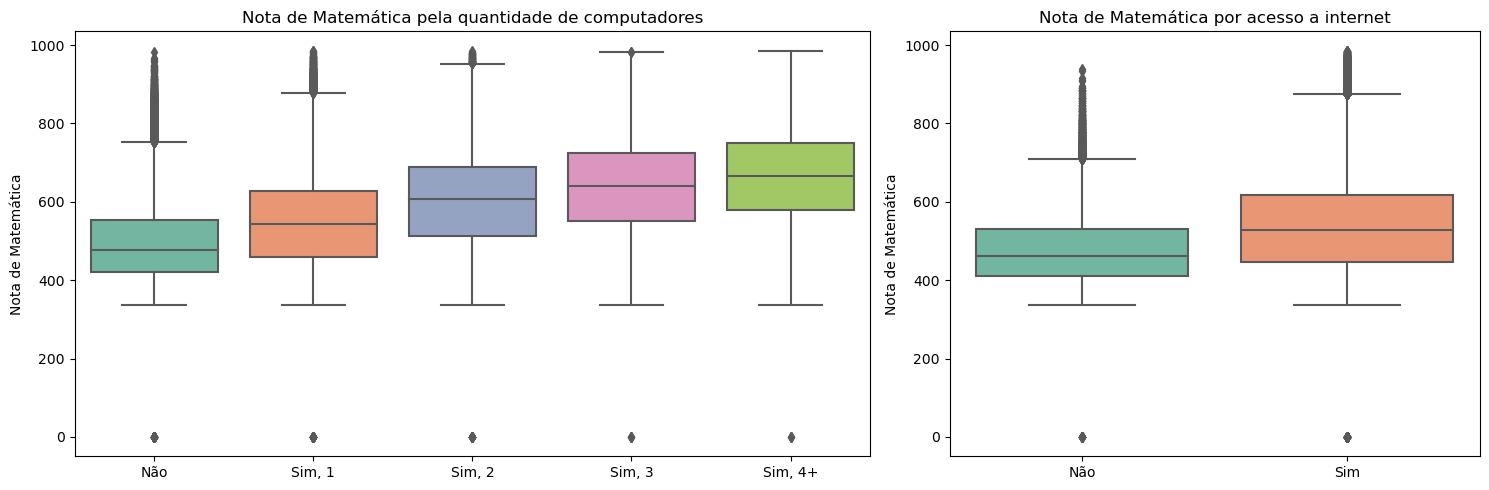

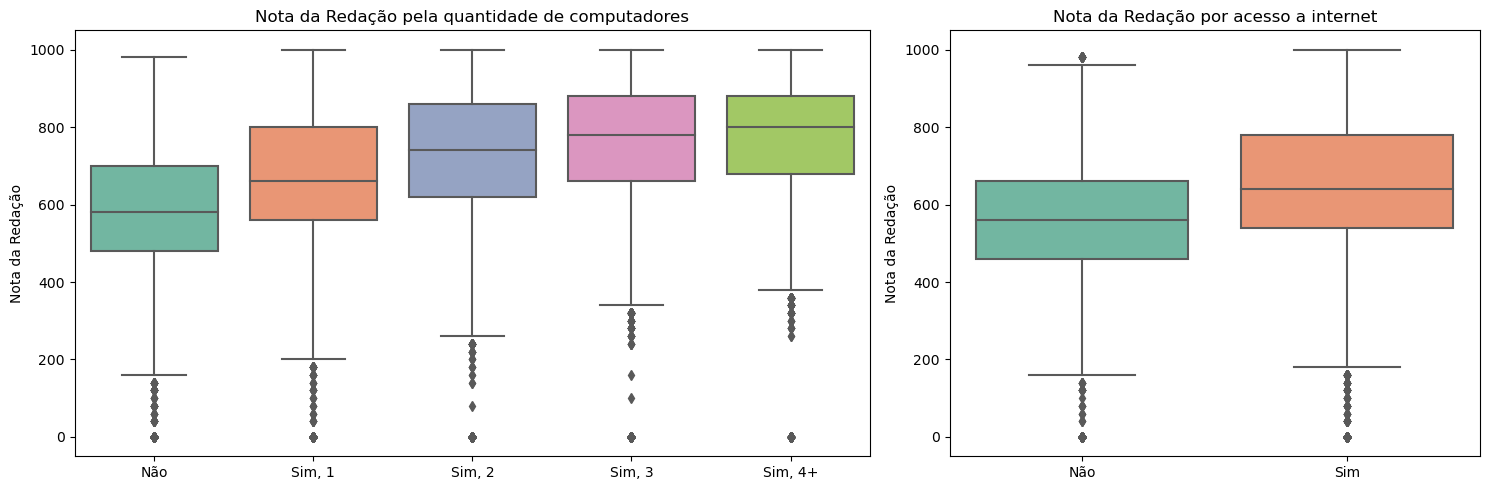

In [56]:
# Compare a nota de matemática e  de redação com o acesso a computadores e a internet
for materia in ['NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2])
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    sns.boxplot(x=df_microdados['Acesso a Computadores'], y=df_microdados[materia], ax=ax1, 
                order = ['Não', 'Sim, 1', "Sim, 2", "Sim, 3", "Sim, 4+"], palette='Set2')
    ax1.set_ylabel(dict_area[materia])
    ax1.set_title(f"{dict_area[materia]} pela quantidade de computadores")
    ax1.set_xlabel('')
    sns.boxplot(x=df_microdados['Acesso a Internet'], y=df_microdados[materia], ax=ax2, 
                order = ["Não", "Sim"], palette='Set2')
    ax2.set_ylabel(dict_area[materia])
    ax2.set_title(f"{dict_area[materia]} por acesso a internet")
    ax2.set_xlabel('')

    plt.tight_layout();
    plt.show()

### Distribuição de notas (redação e matemática) por capitais

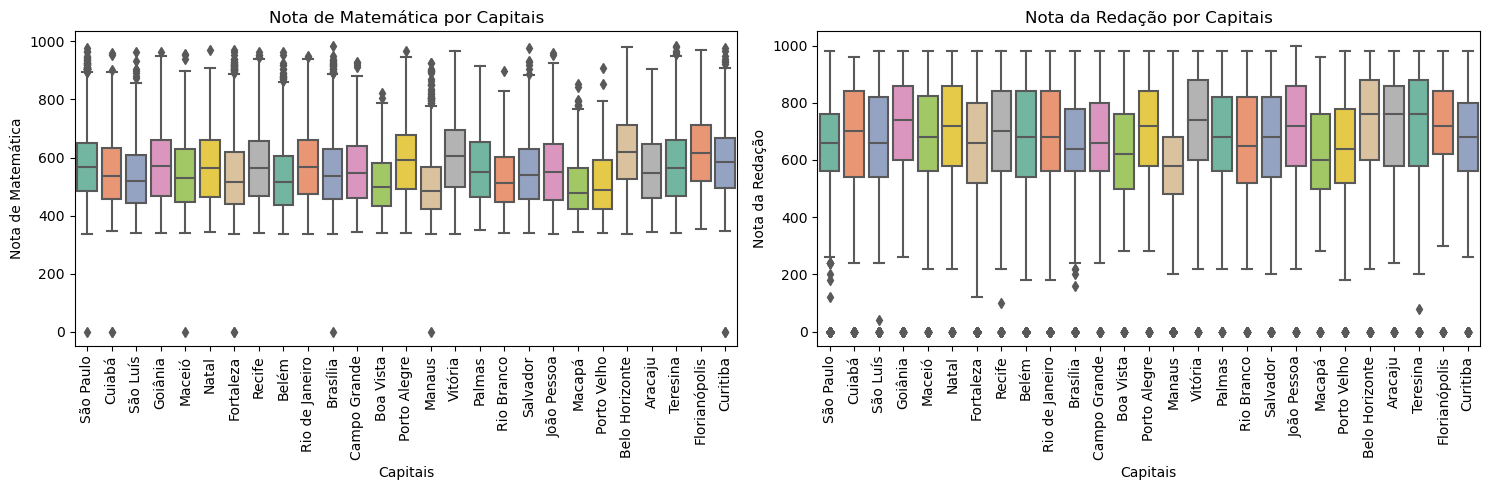

In [57]:
# Inverte o dicionário
codigos_capitais_invertidos = {v: k for k, v in codigos_capitais.items()}

# Cria uma cópia do dataframe original
df_microdados_copy = df_microdados.copy()

# Realiza o mapeamento no dataframe copiado
df_microdados_copy['CO_MUNICIPIO_ESC'] = df_microdados_copy['CO_MUNICIPIO_ESC'].map(codigos_capitais_invertidos)

# Cria os gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()

sns.boxplot(x='CO_MUNICIPIO_ESC', y='NU_NOTA_MT', data=df_microdados_copy, ax=axes[0], palette='Set2')
axes[0].set_xlabel('Capitais')
axes[0].set_ylabel('Nota de Matemática')
axes[0].set_title('Nota de Matemática por Capitais')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Adiciona rotação aos rótulos do eixo x

sns.boxplot(x='CO_MUNICIPIO_ESC', y='NU_NOTA_REDACAO', data=df_microdados_copy, ax=axes[1], palette='Set2')
axes[1].set_xlabel('Capitais')
axes[1].set_ylabel('Nota da Redação')
axes[1].set_title('Nota da Redação por Capitais')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Adiciona rotação aos rótulos do eixo x

plt.tight_layout()
plt.show()



### Avaliando métodos de estudo dos alunos durante a pandemia

In [107]:
# cria um dataframe com 8 colunas
metodos = {}
col_metodos = ['Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019','Q020']
for i in range(8):
    #filter where df_microdados[question] is equal to 'C' or 'D' 
    metodos[i] = df_microdados[((df_microdados[col_metodos[i]] == 'A') | (df_microdados[col_metodos[i]] == 'D'))]


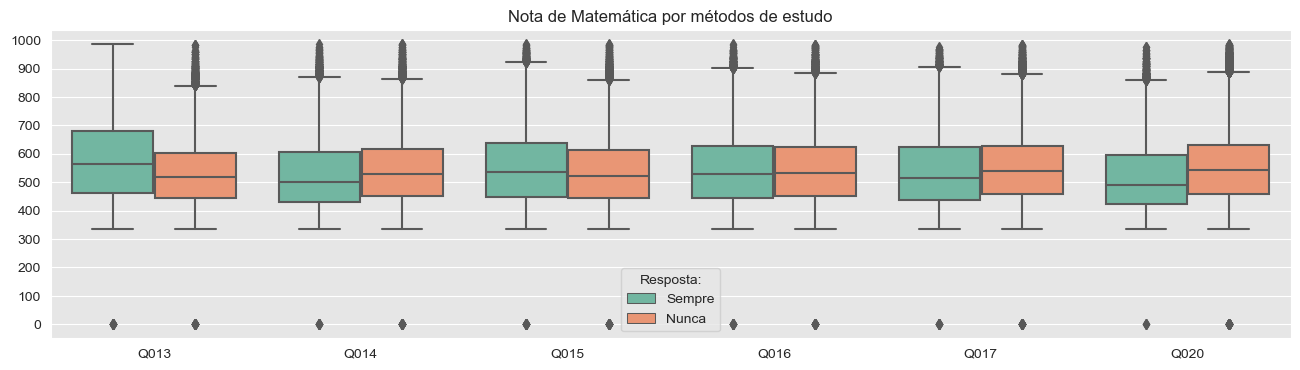

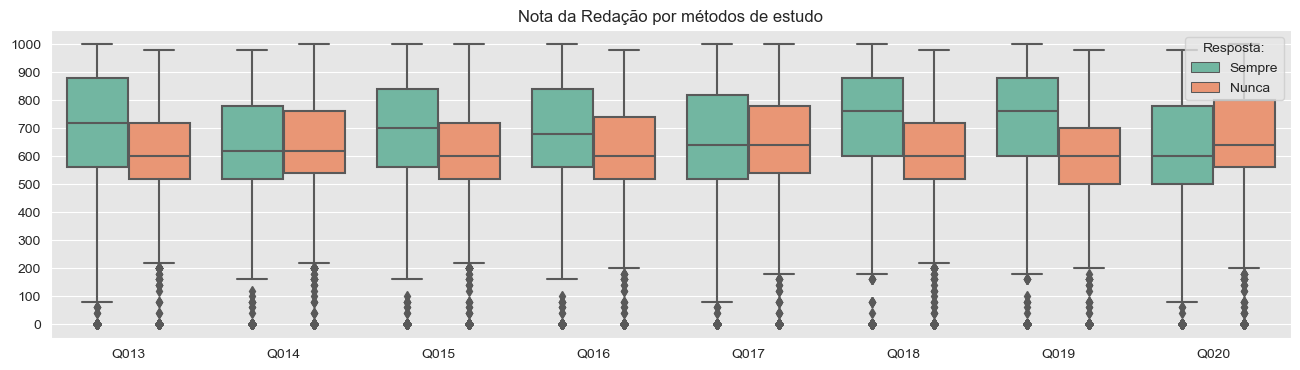

In [108]:
for materia in ['NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    combined_data = pd.DataFrame()
    for i, col in enumerate(col_metodos):
        # Add a 'Question' column to indicate the source question for the boxplot
        if materia == "NU_NOTA_MT":
            excluir = ['Q018', 'Q019']
            if col not in excluir:
                temp = metodos[i][[col, materia]].copy()
                temp['Question'] = col
                temp.rename(columns={col: 'Answer'}, inplace=True)
                combined_data = pd.concat([combined_data, temp])
        else:
            temp = metodos[i][[col, materia]].copy()
            temp['Question'] = col
            temp.rename(columns={col: 'Answer'}, inplace=True)
            combined_data = pd.concat([combined_data, temp])

    combined_data['Answer'] = combined_data['Answer'].map({'D': 'Sempre', 'A': 'Nunca'})
    plt.figure(figsize=(16, 4))  
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.boxplot(data=combined_data, x='Question', y=materia, hue='Answer', palette='Set2')

    plt.title(f'{dict_area[materia]} por métodos de estudo')
    plt.legend(title='Resposta:')
    plt.yticks(range(0, 1001, 100))
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

### Legenda

- Q013: Fiz atividades avaliativas, inclusive simulados
- Q014: Aproveitei o tempo das aulas online ou atividades de reforço
- Q015: Fiz anotações de videoaulas ou podcasts
- Q016: Fiz anotações de vídeos complementares
- Q017: Destaquei dúvidas que tive ao ler textos para esclarecer com os professores
- Q018: Estruturei as principais ideias para produzir redações
- Q019: Fiz redações
- Q020: Participei de fóruns de discussão para tirar dúvidas

Observando os gráficos, notamos que um método de estudo se destacou em ambas áreas:

- Fiz atividades avaliativas, inclusive simulados

Além disso, em redação, também se destacaram fortemente:

- Estruturei as principais ideias para produzir redações
- Fiz redações

### Avaliando dificuldades de infraestrutura encontradas nos estudos

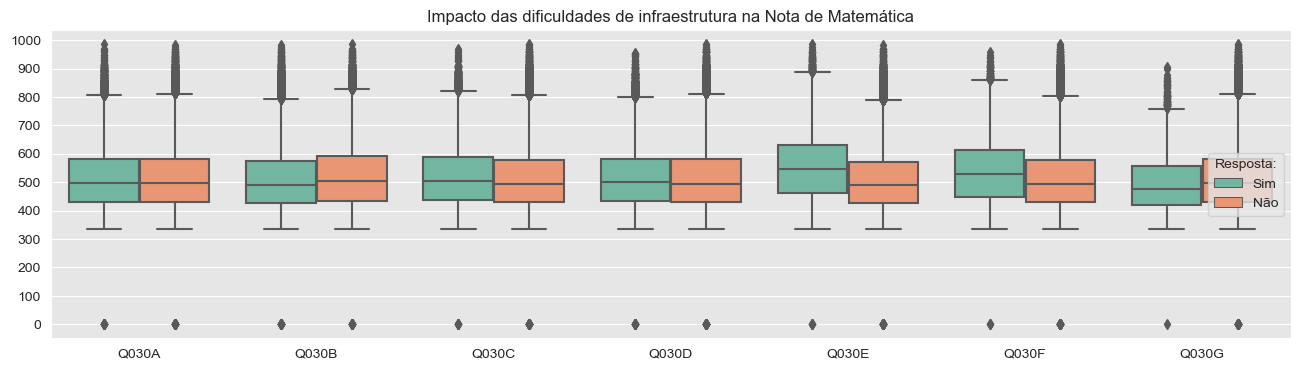

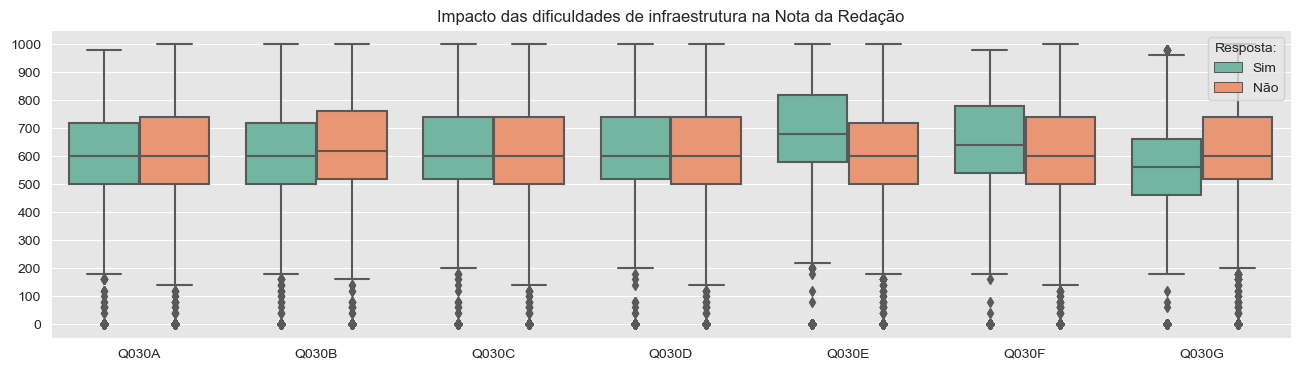

In [116]:
dificuldades = {}
col_dificuldades = ['Q030A', 'Q030B', 'Q030C','Q030D', 'Q030E', 'Q030F', 'Q030G']

for materia in ['NU_NOTA_MT', 'NU_NOTA_REDACAO']:
    combined_data = pd.DataFrame()
    for i, col in enumerate(col_dificuldades):
        # Add a 'Question' column to indicate the source question for the boxplot
        temp = df_microdados[[col, materia]].copy()
        temp['Question'] = col
        temp.rename(columns={col: 'Answer'}, inplace=True)
        combined_data = pd.concat([combined_data, temp])

    combined_data['Answer'] = combined_data['Answer'].map({'A': 'Sim', 'B': 'Não'})
    plt.figure(figsize=(16, 4))  
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.boxplot(data=combined_data, x='Question', y=materia, hue='Answer', palette='Set2')

    plt.title(f'Impacto das dificuldades de infraestrutura na {dict_area[materia]}')
    plt.legend(title='Resposta:')
    plt.yticks(range(0, 1001, 100))
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

### Legenda

- Q030A: Equipamento (computador pessoal ou notebook) pouco disponível por ser compartilhado com outros familiares.
- Q030B: Conexão ruim ou limitada com a internet.
- Q030C: Equipamento (computador pessoal ou notebook) com configuração insuficiente para estudar ou acessar materiais.`
- Q030D: Material pedagógico insuficiente para estudar, faltando livros, apostilas, textos, vídeos.
- Q030E: Local de estudos faltando boa iluminação, higiene, ventilação e silêncio.
- Q030F: Local de estudos sem mobília para guardar e para dispor os materiais de estudo.
- Q030G: Recursos insuficientes para alimentação.

Observando os gráficos, notamos que a maioria dos problemas de infraestrutura mencionados no questionário não parecem ter tido grande impacto no desempenho dos alunos. Mesmo assim, dois problemas se acentuaram em relação aos demais:

- Conexão ruim ou limitada com a internet.
- Recursos insuficientes para alimentação.

## Modelos de Regressão Linear